In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
import pandas as pd
import numpy as np
import os
import pickle
import io
from PIL import Image 
import cv2
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
NUM_EPOCH = 30
NUM_CLASSES = 10
BATCH_SIZE = 100
LEARNING_RATE = 0.001

In [3]:
data_file = 'data/sound_dataset_96_125_d2.pkl'
with open(data_file, 'rb') as f:
    dataset = pickle.load(f)

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=dataset[0],
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=dataset[1],
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True)

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(5, 10, kernel_size=3, padding=1)
#         self.mp = nn.MaxPool2d(3)
        self.gap = nn.AvgPool2d(1)
        self.fc = nn.Linear(120000, 10)
        
    def forward(self, x):
#         x = x.view(1, 1, 96, 125)
        x = torch.unsqueeze(x, 1)
        in_size = x.size(0)
        x1 = F.relu(self.conv1(x))
        x2 = F.relu(self.conv2(x1))
        x3 = self.gap(x2)
        x4 = x3.view(in_size, -1)
        x5 = F.log_softmax(self.fc(x4))
        return x5

In [6]:
# model = Net()
# # model.load_state_dict(torch.load('CNN_GAP_dict.pkl'))
# # criterion = nn.CrossEntropyLoss()
# # optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
# model.eval()
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [181]:
# for parma in model.parameters():
#     parma.requires_grad = False

In [111]:
# model.fc = nn.Linear(31, 10)

In [7]:
# Train the model
total_step = len(train_loader)
train_loss_list = []
test_loss_list = []
test_accuracy_list = []

for epoch in range(NUM_EPOCH):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
#         images = images.to(device)
#         labels = labels.to(device)
        
        # Forward pass
#         outputs = model(images).double()
#         labels = labels.long()
        outputs = model(images)
        labels = labels.long()
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i) % 100 == 0:
            train_loss_list.append(loss.item())
            print ('Epoch [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, NUM_EPOCH, loss.item()))
#             model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
#             with torch.no_grad():
#                 correct = 0
#                 total = 0
#                 for images, labels in test_loader:
#                     images = images.to(device)
#                     labels = labels.to(device)
#                     outputs = model(images)
#                     _, predicted = torch.max(outputs.data, 1)
#                     total += labels.size(0)
#                     correct += (predicted == labels).sum().item()

#                 print('Test Accuracy of the model on the 250 test images: {} %'.format(100 * correct / total))
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
#         data, target = Variable(data, volatile=True), Variable(target)
#         data = data.to(device)
#         target = target.to(device)
        output = model(data).double()
        # sum up batch loss
        target = target.long()
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(test_loader.dataset)
    test_loss_list.append(test_loss.item())
    test_accuracy_list.append((100. * correct / len(test_loader.dataset)).item())
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
#             print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
#                    .format(epoch+1, NUM_EPOCH, i+1, total_step, loss.item()))


C:\Users\Hyde\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/30], Loss: 2.3102


C:\Users\Hyde\anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 2.8957, Accuracy: 40/200 (20%)

Epoch [2/30], Loss: 2.8945

Test set: Average loss: 2.2641, Accuracy: 20/200 (10%)

Epoch [3/30], Loss: 2.2082

Test set: Average loss: 2.0962, Accuracy: 61/200 (30%)

Epoch [4/30], Loss: 2.0950

Test set: Average loss: 1.8459, Accuracy: 146/200 (73%)

Epoch [5/30], Loss: 1.8194

Test set: Average loss: 1.6066, Accuracy: 192/200 (96%)

Epoch [6/30], Loss: 1.6116

Test set: Average loss: 1.3592, Accuracy: 193/200 (96%)

Epoch [7/30], Loss: 1.2954

Test set: Average loss: 1.0480, Accuracy: 197/200 (98%)

Epoch [8/30], Loss: 0.9507

Test set: Average loss: 0.5530, Accuracy: 200/200 (100%)

Epoch [9/30], Loss: 0.4877

Test set: Average loss: 0.1477, Accuracy: 200/200 (100%)

Epoch [10/30], Loss: 0.1177

Test set: Average loss: 0.0158, Accuracy: 200/200 (100%)

Epoch [11/30], Loss: 0.0097

Test set: Average loss: 0.0025, Accuracy: 200/200 (100%)

Epoch [12/30], Loss: 0.0011

Test set: Average loss: 0.0008, Accuracy: 200/200 (100%)

Ep

In [8]:
finalconv_name = 'conv2'
features_blobs = []
def hook_feature(module, input, output):
    features_blobs.append(output.data.numpy())

model._modules.get(finalconv_name).register_forward_hook(hook_feature)


In [9]:
params = list(model.parameters())
weight_softmax = np.squeeze(params[-2].data.numpy()).T

print(np.size(weight_softmax, 0))

120000


In [10]:
def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 96x125
    size_upsample = (96, 125)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

In [212]:
data_file = 'data/sound_dataset_96_125_d2.pkl'
with open(data_file, 'rb') as f:
    dataset = pickle.load(f)

In [31]:
img = dataset[1][21]
img_arr = np.asarray([t.numpy() for t in img])
img = Variable(torch.from_numpy(img_arr[0])).view(1,96,125)
# img = Variable(img).view(1,1,96,125)
Img = torch.squeeze(img,dim = 0).numpy().reshape(96,125,1)
Img

array([[[0.7141378 ],
        [0.6893581 ],
        [0.6665263 ],
        ...,
        [0.5861727 ],
        [0.57465845],
        [0.5665306 ]],

       [[0.5867637 ],
        [0.5542305 ],
        [0.5196481 ],
        ...,
        [0.5402085 ],
        [0.5457056 ],
        [0.5439322 ]],

       [[0.51035774],
        [0.4691942 ],
        [0.42497307],
        ...,
        [0.5162708 ],
        [0.54921925],
        [0.5442511 ]],

       ...,

       [[0.5665852 ],
        [0.5405313 ],
        [0.4757648 ],
        ...,
        [0.4839237 ],
        [0.44744217],
        [0.40874943]],

       [[0.56802183],
        [0.5165374 ],
        [0.43559805],
        ...,
        [0.4458218 ],
        [0.40951112],
        [0.35982916]],

       [[0.557683  ],
        [0.49736586],
        [0.42879504],
        ...,
        [0.4606673 ],
        [0.39808485],
        [0.34707963]]], dtype=float32)

In [13]:
def get_features(pretrained_model, x, layers = [1,2]):
    net1 = nn.Sequential(*list(pretrained_model.children())[:layers[0]])
    out1 = net1(x) 
    net2 = nn.Sequential(*list(pretrained_model.children())[layers[0]:layers[1]])
    out2 = net2(out1)
    return out1, out2

In [14]:
output1,output2 = get_features(model,img)

In [15]:
output2.size()

torch.Size([1, 10, 96, 125])

In [20]:
logit = model(img)

C:\Users\Hyde\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [21]:
h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)
probs = probs.numpy()
idx = idx.numpy()
print(probs, idx)

[9.9982518e-01 6.2957944e-05 3.6666774e-05 3.3126365e-05 1.5802339e-05
 1.3955947e-05 8.6272494e-06 3.1458414e-06 3.1516896e-07 2.9364540e-07] [1 0 3 8 5 7 2 6 4 9]


In [22]:
CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[0]])

In [28]:
# print('output CAM.jpg for the top1 prediction: %s'%classes[idx[0]])
img = cv2.imread('test.jpg')
height = 96
width = 125
heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
result = heatmap *0.7 + Img*0.5 
cv2.imwrite('CAM.jpg', result)


True

3


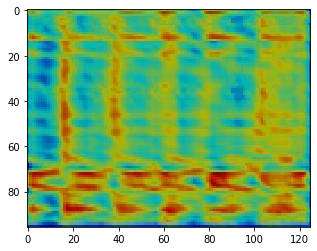

In [29]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = Image.open('CAM.jpg')
# im.show() 
img = np.array(im)      # image类 转 numpy
print(np.size(img, 2))
# img = img[:,:,0]        #第1通道
img=Image.fromarray(img) # numpy 转 image类
# img.show()
plt.imshow(img, interpolation='nearest')
plt.show()